In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid")
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

In [2]:

from hw_kernels import SVR, RBF, Polynomial, \
    KernelizedRidgeRegression, supportVectors

In [4]:
df = pd.read_csv('housing2r.csv')
y = df['y'].values
x  = df.drop('y', axis=1).values
eighty = int(len(y)*0.8)
x_train = x[:eighty]
y_train = y[:eighty]
x_test = x[eighty:]
y_test = y[eighty:]

M = [i for i in range(1,11)]
sigma = [0.2*i for i in range(1,11)]

lam = 1

def MSE(y, y_hat):
    return ((y-y_hat)**2)

errors_krr_M1 = [None for _ in range(len(M))]
errors_krr_s1 = [None for _ in range(len(sigma))]

for i in tqdm(range(len(M))):
    krr = KernelizedRidgeRegression(Polynomial(M[i]), lam)
    scaler = StandardScaler()
    x_tr = scaler.fit_transform(x_train)
    x_te = scaler.transform(x_test)
    krr.fit(x_tr, y_train)
    y_hat = krr.predict(x_te)
    errors_krr_M1[i] = MSE(y_test, y_hat)

mean_errors_krr_M1 = [np.mean(e) for e in errors_krr_M1]
se_errors_krr_M1 = [np.std(e)/np.sqrt(len(e)) for e in errors_krr_M1]

for i in tqdm(range(len(M))):
    krr = KernelizedRidgeRegression(RBF(sigma[i]), lam)
    scaler = StandardScaler()
    x_tr = scaler.fit_transform(x_train)
    x_te = scaler.transform(x_test)
    krr.fit(x_tr, y_train)
    y_hat = krr.predict(x_te)
    errors_krr_s1[i] = MSE(y_test, y_hat)

mean_errors_krr_s1 = [np.mean(e) for e in errors_krr_s1]
se_errors_krr_s1 = [np.std(e)/np.sqrt(len(e)) for e in errors_krr_s1]


errors_svr_M1 = [None for _ in range(len(M))]
errors_svr_s1 = [None for _ in range(len(sigma))]
supports_M1 = [None for _ in range(len(M))]
supports_s1 = [None for _ in range(len(sigma))]

epsilon = 10

for i in tqdm(range(len(M))):
    svr = SVR(Polynomial(M[i]), lam, epsilon)
    scaler = StandardScaler()
    x_tr = scaler.fit_transform(x_train)
    x_te = scaler.transform(x_test)
    svr.fit(x_tr, y_train)
    y_hat = svr.predict(x_te)
    errors_svr_M1[i] = MSE(y_test, y_hat)
    supports_M1[i] = supportVectors(svr, 1e-8).sum()

mean_errors_svr_M1 = [np.mean(e) for e in errors_svr_M1]
se_errors_svr_M1 = [np.std(e)/np.sqrt(len(e)) for e in errors_svr_M1]

for i in tqdm(range(len(sigma))):
    svr = SVR(RBF(sigma[i]), lam, epsilon)
    scaler = StandardScaler()
    x_tr = scaler.fit_transform(x_train)
    x_te = scaler.transform(x_test)
    svr.fit(x_tr, y_train)
    y_hat = svr.predict(x_te)
    errors_svr_s1[i] = MSE(y_test, y_hat)
    supports_s1[i] = supportVectors(svr, 1e-8).sum()

mean_errors_svr_s1 = [np.mean(e) for e in errors_svr_s1]
se_errors_svr_s1 = [np.std(e)/np.sqrt(len(e)) for e in errors_svr_s1]

100%|██████████| 10/10 [00:01<00:00,  5.84it/s]


NameError: name 'mean_errors_krr_M2' is not defined

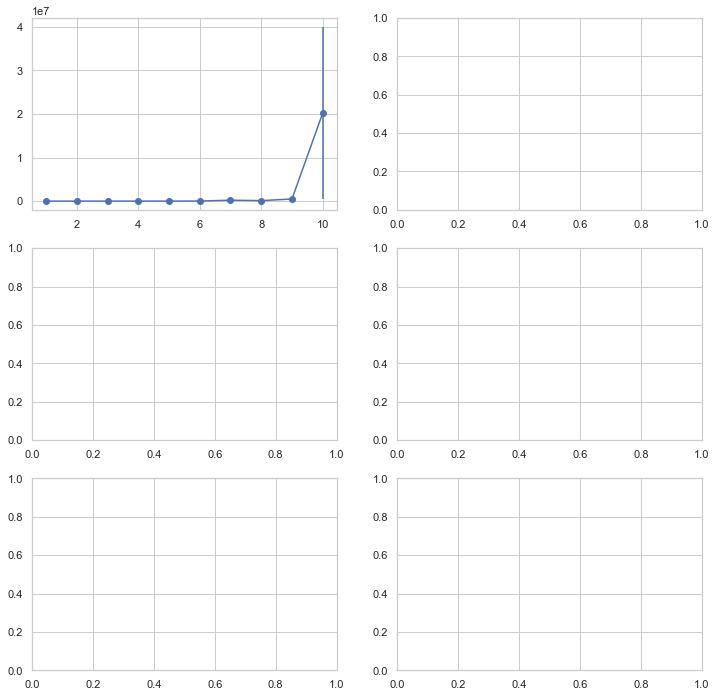

In [5]:
# 3x2 subplots, with bottom row being smaller

ylim = 160
ylim2 = 30

fig, axs = plt.subplots(3, 2, figsize=(12, 12))


axs[0, 0].errorbar(M, mean_errors_krr_M1, yerr=se_errors_krr_M1, fmt='o-')
axs[0, 0].errorbar(M, mean_errors_krr_M2, yerr=se_errors_krr_M2, fmt='o-', color='red', alpha=0.5)
axs[0, 0].set_title('KRR Polynomial Kernel')
axs[0, 0].set_xlabel('M')
axs[0, 0].set_ylabel('MSE')
axs[0, 0].set_ylim(ylim2, ylim)
axs[0, 0].set_xticks(M)

axs[0, 1].errorbar(sigma, mean_errors_krr_s1, yerr=se_errors_krr_s1, fmt='o-')
axs[0, 1].errorbar(sigma, mean_errors_krr_s2, yerr=se_errors_krr_s2, fmt='o-', color='red', alpha=0.5)
axs[0, 1].set_title('KRR RBF Kernel')
axs[0, 1].set_xlabel('sigma')
axs[0, 1].set_ylabel('MSE')
axs[0, 1].set_ylim(ylim2, ylim)
axs[0, 1].set_xticks(sigma)

axs[1, 0].errorbar(M, mean_errors_svr_M1, yerr=se_errors_svr_M1, fmt='o-')
axs[1, 0].errorbar(M, mean_errors_svr_M2, yerr=se_errors_svr_M2, fmt='o-', color='red', alpha=0.5)
axs[1, 0].set_title('SVR Polynomial Kernel')
axs[1, 0].set_xlabel('M')
axs[1, 0].set_ylabel('MSE')
axs[1, 0].set_ylim(ylim2, ylim)
axs[1, 0].set_xticks(M)

axs[1, 1].errorbar(sigma, mean_errors_svr_s1, yerr=se_errors_svr_s1, fmt='o-')
axs[1, 1].errorbar(sigma, mean_errors_svr_s2, yerr=se_errors_svr_s2, fmt='o-', color='red', alpha=0.5)
axs[1, 1].set_title('SVR RBF Kernel')
axs[1, 1].set_xlabel('sigma')
axs[1, 1].set_ylabel('MSE')
axs[1, 1].set_ylim(ylim2, ylim)
axs[1, 1].set_xticks(sigma)


axs[2, 0].plot(M, supports_M1, 'o-')
axs[2, 0].plot(M, supports_M2, 'o-', color="red", alpha=0.5)
axs[2, 0].set_title('Support Vectors Polynomial Kernel')
axs[2, 0].set_xlabel('M')
axs[2, 0].set_ylabel('Support Vectors')
axs[2, 0].set_ylim(0, 50)
axs[2, 0].set_xticks(M)

axs[2, 1].plot(sigma, supports_s1, 'o-')
axs[2, 1].plot(sigma, supports_s2, 'o-', color="red", alpha=0.5)
axs[2, 1].set_title('Support Vectors RBF Kernel')
axs[2, 1].set_xlabel('sigma')
axs[2, 1].set_ylabel('Support Vectors')
axs[2, 1].set_ylim(0, 50)
axs[2, 1].set_xticks(sigma)

plt.tight_layout()
# plt.show()
plt.savefig('housing.svg')

In [ ]:
    lambdas = [10**(i/2) for i in range(-10, 11)]
    errors_krr_M2 = [None for _ in range(len(M))]
    errors_krr_s2 = [None for _ in range(len(sigma))]

    y = y_train
    x = x_train
    k = 4

    np.random.seed(42)
    idx = np.random.permutation(len(y))
    x, y = x[idx], y[idx]
    id_splits = np.array_split(idx, k)
    x_folds, y_folds = np.array_split(x, k), np.array_split(y, k)

    best_lambdas_krr = []
    for MM in tqdm(M):
        best_lambda = lambdas[0]
        best_mse = np.inf
        for lam in lambdas:
            losses = np.zeros(len(y))
            for i in range(k):
                x_tr = np.concatenate([x_folds[j] for j in range(k) if j != i])
                y_tr = np.concatenate([y_folds[j] for j in range(k) if j != i])
                x_te = x_folds[i]
                y_te = y_folds[i]

                scaler = StandardScaler()
                x_tr = scaler.fit_transform(x_tr)
                x_te = scaler.transform(x_te)

                krr = KernelizedRidgeRegression(Polynomial(MM), lam)
                krr.fit(x_tr, y_tr)
                y_hat = krr.predict(x_te)

                losses[id_splits[i]] = MSE(y_te, y_hat)

            mean_error = np.mean(losses)
            se_error = np.std(losses)/np.sqrt(len(losses))
            # print(mean_error)
            if mean_error < best_mse:
                best_mse = mean_error
                best_lambda = lam

        # print()
        # print(best_mse)
        best_lambdas_krr.append(best_lambda)

    errors_krr_M2 = [None for _ in range(len(M))]
    for i in tqdm(range(len(M))):
        krr = KernelizedRidgeRegression(Polynomial(M[i]), best_lambdas_krr[i])
        scaler = StandardScaler()
        x_tr = scaler.fit_transform(x_train)
        x_te = scaler.transform(x_test)
        krr.fit(x_tr, y_train)
        y_hat = krr.predict(x_te)
        errors_krr_M2[i] = MSE(y_test, y_hat)

    mean_errors_krr_M2 = [np.mean(e) for e in errors_krr_M2]
    se_errors_krr_M2 = [np.std(e)/np.sqrt(len(e)) for e in errors_krr_M2]

    best_lambdas_krr_s2 = []
    for ss in tqdm(sigma):
        best_lambda = lambdas[0]
        best_mse = np.inf
        for lam in lambdas:
            losses = np.zeros(len(y))
            for i in range(k):
                x_tr = np.concatenate([x_folds[j] for j in range(k) if j != i])
                y_tr = np.concatenate([y_folds[j] for j in range(k) if j != i])
                x_te = x_folds[i]
                y_te = y_folds[i]

                scaler = StandardScaler()
                x_tr = scaler.fit_transform(x_tr)
                x_te = scaler.transform(x_te)

                krr = KernelizedRidgeRegression(RBF(ss), lam)
                krr.fit(x_tr, y_tr)
                y_hat = krr.predict(x_te)

                losses[id_splits[i]] = MSE(y_te, y_hat)

            mean_error = np.mean(losses)
            se_error = np.std(losses)/np.sqrt(len(losses))
            # print(mean_error)
            if mean_error < best_mse:
                best_mse = mean_error
                best_lambda = lam

        best_lambdas_krr_s2.append(best_lambda)

    errors_krr_s2 = [None for _ in range(len(M))]
    for i in tqdm(range(len(sigma))):
        krr = KernelizedRidgeRegression(RBF(sigma[i]), best_lambdas_krr_s2[i])
        scaler = StandardScaler()
        x_tr = scaler.fit_transform(x_train)
        x_te = scaler.transform(x_test)
        krr.fit(x_tr, y_train)
        y_hat = krr.predict(x_te)
        errors_krr_s2[i] = MSE(y_test, y_hat)

    mean_errors_krr_s2 = [np.mean(e) for e in errors_krr_s2]
    se_errors_krr_s2 = [np.std(e)/np.sqrt(len(e)) for e in errors_krr_s2]



    ambdas = [10**(i) for i in range(-5, 6)]
    errors_svr_M2 = [None for _ in range(len(M))]
    errors_svr_s2 = [None for _ in range(len(sigma))]

    supports_M2 = [None for _ in range(len(M))]
    supports_s2 = [None for _ in range(len(sigma))]

    epsilon = 7

    best_lambdas_svr_M2 = []
    for MM in tqdm(M):
        best_lambda = lambdas[0]
        best_mse = np.inf
        for lam in lambdas:
            try:
                losses = np.zeros(len(y))
                for i in range(k):
                    x_tr = np.concatenate([x_folds[j] for j in range(k) if j != i])
                    y_tr = np.concatenate([y_folds[j] for j in range(k) if j != i])
                    x_te = x_folds[i]
                    y_te = y_folds[i]

                    scaler = StandardScaler()
                    x_tr = scaler.fit_transform(x_tr)
                    x_te = scaler.transform(x_te)

                    svr = SVR(Polynomial(MM), lam, epsilon)
                    svr.fit(x_tr, y_tr)
                    y_hat = svr.predict(x_te)

                    losses[id_splits[i]] = MSE(y_te, y_hat)

                mean_error = np.mean(losses)
                se_error = np.std(losses)/np.sqrt(len(losses))
                # print(mean_error)
                if mean_error < best_mse:
                    best_mse = mean_error
                    best_lambda = lam
            except:
                print("Error at lambda", lam, "M", MM)

        # print()
        # print(best_mse)
        best_lambdas_svr_M2.append(best_lambda)

    errors_svr_M2 = [None for _ in range(len(M))]
    for i in tqdm(range(len(M))):
        svr = SVR(Polynomial(M[i]), best_lambdas_svr_M2[i], epsilon)
        scaler = StandardScaler()
        x_tr = scaler.fit_transform(x_train)
        x_te = scaler.transform(x_test)
        svr.fit(x_tr, y_train)
        y_hat = svr.predict(x_te)
        errors_svr_M2[i] = MSE(y_test, y_hat)
        supports_M2[i] = supportVectors(svr, 1e-8).sum()

    mean_errors_svr_M2 = [np.mean(e) for e in errors_svr_M2]
    se_errors_svr_M2 = [np.std(e)/np.sqrt(len(e)) for e in errors_svr_M2]


    best_lambdas_svr_s2 = []
    for ss in tqdm(sigma):
        best_lambda = lambdas[0]
        best_mse = np.inf
        for lam in lambdas:
            try:
                losses = np.zeros(len(y))
                for i in range(k):
                    x_tr = np.concatenate([x_folds[j] for j in range(k) if j != i])
                    y_tr = np.concatenate([y_folds[j] for j in range(k) if j != i])
                    x_te = x_folds[i]
                    y_te = y_folds[i]

                    scaler = StandardScaler()
                    x_tr = scaler.fit_transform(x_tr)
                    x_te = scaler.transform(x_te)

                    svr = SVR(RBF(ss), lam, epsilon)
                    svr.fit(x_tr, y_tr)
                    y_hat = svr.predict(x_te)

                    losses[id_splits[i]] = MSE(y_te, y_hat)

                mean_error = np.mean(losses)
                se_error = np.std(losses)/np.sqrt(len(losses))
                # print(mean_error)
                if mean_error < best_mse:
                    best_mse = mean_error
                    best_lambda = lam
            except:
                print("Error at lambda", lam, "M", MM)

        # print()
        # print(best_mse)
        best_lambdas_svr_s2.append(best_lambda)

    errors_svr_s2 = [None for _ in range(len(M))]
    for i in tqdm(range(len(sigma))):
        svr = SVR(RBF(sigma[i]), best_lambdas_svr_s2[i], epsilon)
        scaler = StandardScaler()
        x_tr = scaler.fit_transform(x_train)
        x_te = scaler.transform(x_test)
        svr.fit(x_tr, y_train)
        y_hat = svr.predict(x_te)
        errors_svr_s2[i] = MSE(y_test, y_hat)
        supports_s2[i] = supportVectors(svr, 1e-8).sum()

    mean_errors_svr_s2 = [np.mean(e) for e in errors_svr_s2]
    se_errors_svr_s2 = [np.std(e)/np.sqrt(len(e)) for e in errors_svr_s2]